In [1]:
import pandas as pd

data = pd.read_csv('./CarPrice_Assignment.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
data.shape

(205, 26)

In [4]:
print(data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [5]:
data['CarBrand'] = data['CarName'].str.split(' ').str[0]
data['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
data = data.drop('CarName', axis = 1)

In [7]:
car_brand = data.pop('CarBrand')
data.insert(0, 'CarBrand', car_brand)

In [8]:
data['mpg'] = (2*data['citympg']*data['highwaympg']/(data['citympg']+data['highwaympg']))

data.drop(columns= ['citympg','highwaympg'], inplace = True)

In [9]:
data

,CarBrand,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpg
0,alfa-romero,1,3,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.625000
1,alfa-romero,2,3,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.625000
2,alfa-romero,3,1,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,21.955556
3,audi,4,2,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.666667
4,audi,5,2,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,201,-1,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114,5400,16845.0,25.254902
201,volvo,202,-1,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19045.0,21.590909
202,volvo,203,-1,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134,5500,21485.0,20.195122
203,volvo,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106,4800,22470.0,26.490566


In [10]:
# 'car_ID' 특성 제거
data = data.drop(columns=['car_ID'], axis=1)

# 'symboling' 특성 제거
data = data.drop(columns=['symboling'], axis=1)

data

,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpg
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.625000
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.625000
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,21.955556
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.666667
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,four,141,mpfi,3.78,3.15,9.5,114,5400,16845.0,25.254902
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19045.0,21.590909
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,six,173,mpfi,3.58,2.87,8.8,134,5500,21485.0,20.195122
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,six,145,idi,3.01,3.40,23.0,106,4800,22470.0,26.490566


In [11]:
cat_col = data.select_dtypes(include=['object']).columns
num_col = data.select_dtypes(exclude=['object']).columns
data_cat = data[cat_col]
data_num = data[num_col]

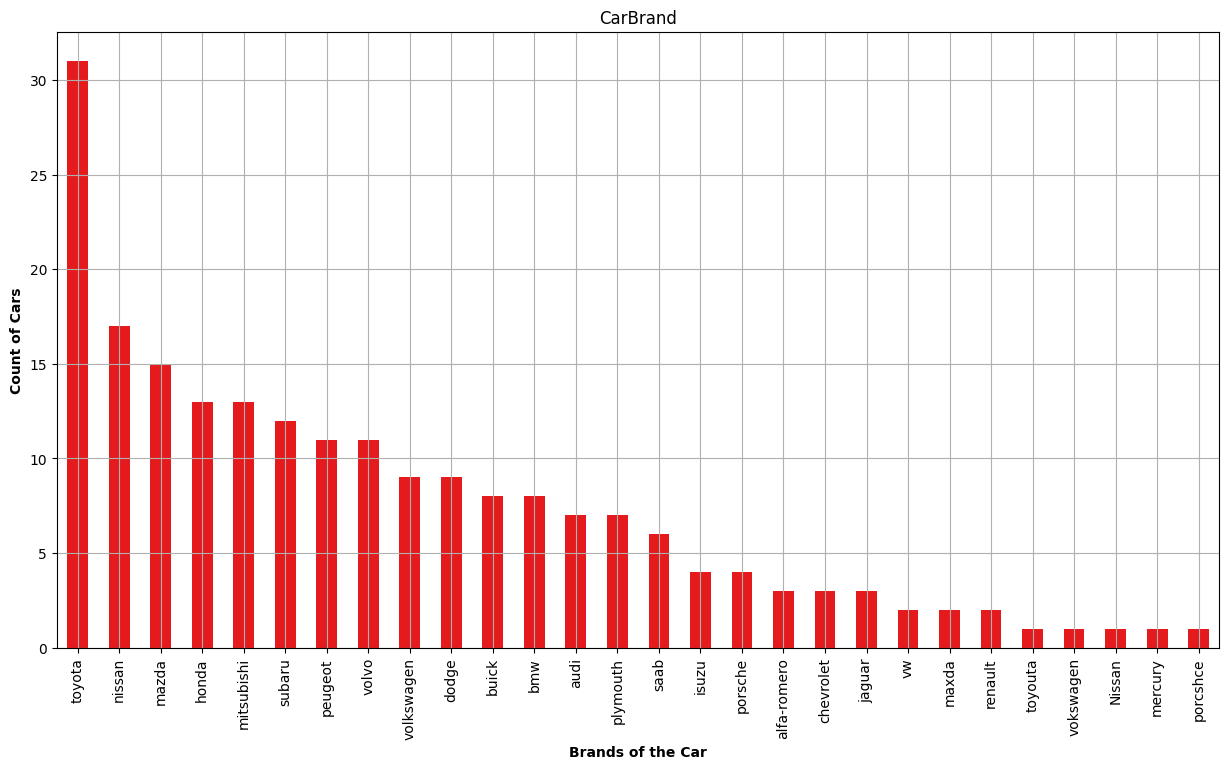

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15,8]
ax=data['CarBrand'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarBrand')
plt.xlabel("Brands of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')
plt.grid()

In [13]:
cat_col

Index(['CarBrand', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [14]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
encoder = OneHotEncoder(sparse=False, drop='first')

# 범주형 변수만 선택하여 OneHot 인코딩 적용
data_categorical = data[cat_col]
data_onehot_encoded = encoder.fit_transform(data_categorical)

# 인코딩된 데이터를 DataFrame으로 변환
columns_encoded = encoder.get_feature_names_out(input_features=cat_col)
data_onehot_df = pd.DataFrame(data_onehot_encoded, columns=columns_encoded)

# 원래의 수치형 데이터와 합침
data_numeric = data.drop(columns=cat_col)
data_final = pd.concat([data_numeric, data_onehot_df], axis=1)
data_final.to_csv('./onehot_encoded.csv')

data_final

c:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  price                  205 non-null    float64
 13  mpg                    205 non-null    float64
 14  CarBrand_alfa-romero   205 non-null    float64
 15  CarBra

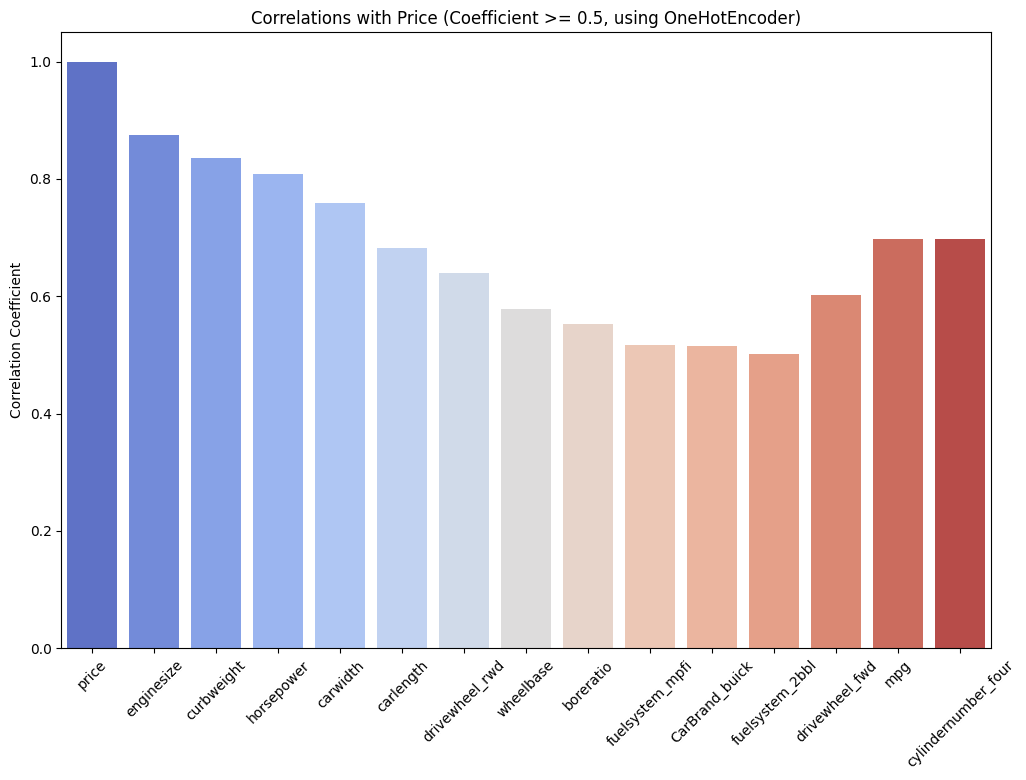

In [16]:
import seaborn as sns
import numpy as np

# 상관관계 행렬 계산
correlation_matrix_final = data_final.corr()

# 상관관계를 'price'와의 관계로 정렬
sorted_correlation_final = correlation_matrix_final['price'].sort_values(ascending=False)
sorted_correlation_final = np.abs(sorted_correlation_final)

# 상관계수가 0.5 이상인 칼럼만 선택
top_corr_filtered = sorted_correlation_final[sorted_correlation_final >= 0.5]

# 상관관계 시각화 (상관계수 0.5 이상)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_corr_filtered.index, y=top_corr_filtered.values, palette='coolwarm')
plt.title('Correlations with Price (Coefficient >= 0.5, using OneHotEncoder)')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.show()

상관계수('price'와의 관계)가 0.5 이상인 칼럼들을 살펴보니 마지막에 CarBrand_buick 칼럼만 브랜드가 영향을 준다. 그래서 자동차 브랜드가 가격 예측에 도움을 준다고 판단되지 않는다.

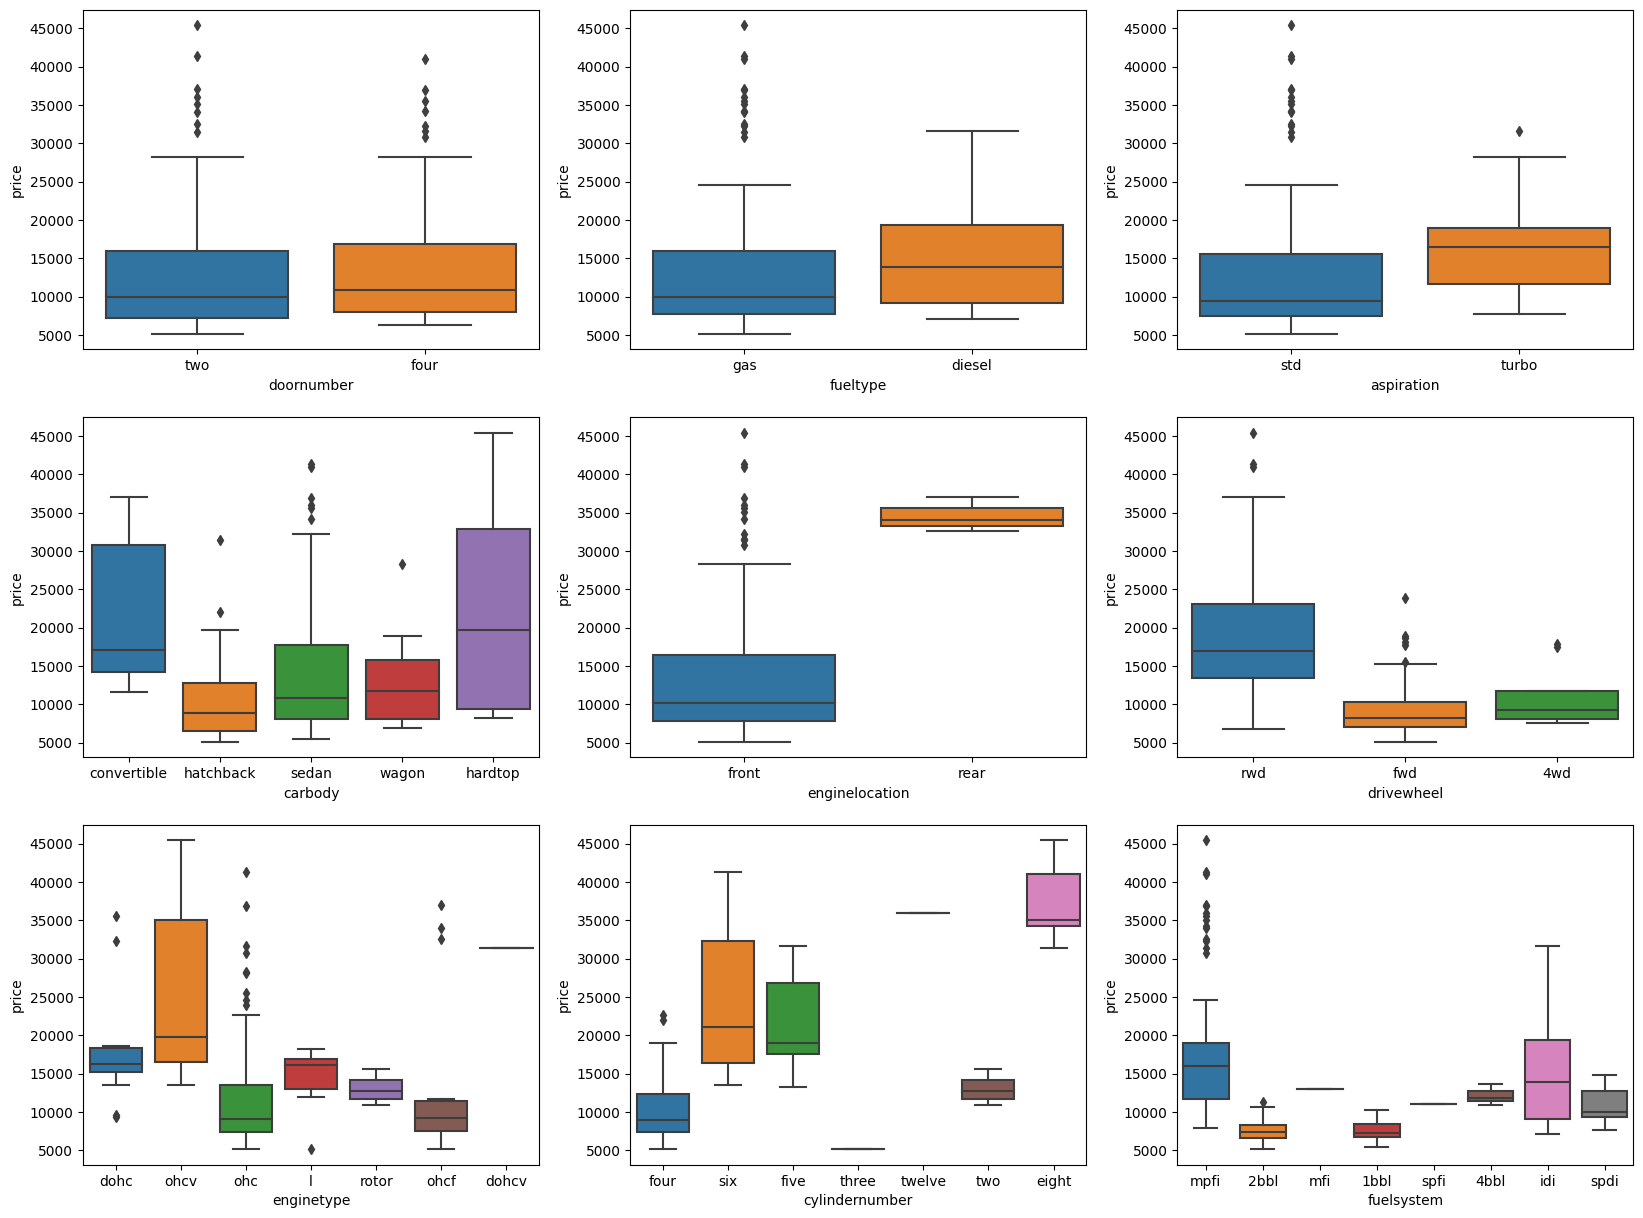

In [17]:
# 박스플롯은 이상치나 분포의 형태를 더 잘 확인할 수 있음

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = data)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)
plt.show()

- doornumber : 육안으로는 판단이 안됨
- fueltype : 평균적으로 diesel 차량이 가격이 높지만, gas차 중에 가격이 높은 차들이 많이 있음
- aspiration : 평균적으로 turbo 차량이 가격이 높지만, std차 중에 가격이 높은 차들이 많이 있음
- carbody : 평균적으로 hardtop 형태의 차량이 가격이 높지만, sedan 중에서 가격이 높은 차들이 몇 있음
- enginelocation : 판단 어려움
- drivewheel : 대개 rwd 차량이 가격이 높음
- enginetype : 평균적으로 ohcv가 높지만 ohc에 이상치가 있음
- cylindernumber : 대개 높을수록 가격이 높음
- fuelsystem : mpfi가 가격이 높음

<Figure size 2000x600 with 0 Axes>

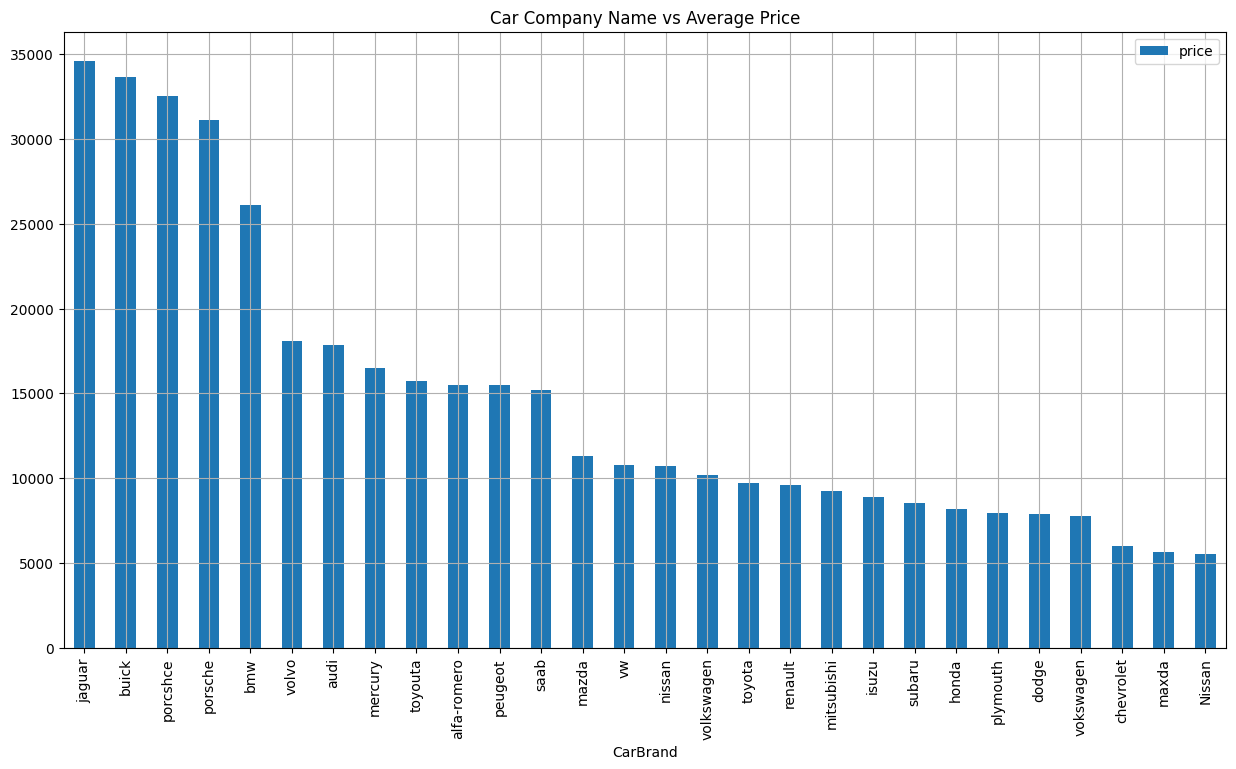

In [18]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(data.groupby(['CarBrand'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.grid()
plt.show()

In [19]:
feature_to_select = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'drivewheel_rwd', 'wheelbase', 'boreratio', 'fuelsystem_mpfi', 'fuelsystem_2bbl', 'drivewheel_fwd', 'mpg', 'price']

In [20]:
data_filtered = data_final[feature_to_select]
data_filtered

,enginesize,curbweight,horsepower,carwidth,carlength,drivewheel_rwd,wheelbase,boreratio,fuelsystem_mpfi,fuelsystem_2bbl,drivewheel_fwd,mpg,price
0,130,2548,111,64.1,168.8,1.0,88.6,3.47,1.0,0.0,0.0,23.625000,13495.0
1,130,2548,111,64.1,168.8,1.0,88.6,3.47,1.0,0.0,0.0,23.625000,16500.0
2,152,2823,154,65.5,171.2,1.0,94.5,2.68,1.0,0.0,0.0,21.955556,16500.0
3,109,2337,102,66.2,176.6,0.0,99.8,3.19,1.0,0.0,1.0,26.666667,13950.0
4,136,2824,115,66.4,176.6,0.0,99.4,3.19,1.0,0.0,0.0,19.800000,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,141,2952,114,68.9,188.8,1.0,109.1,3.78,1.0,0.0,0.0,25.254902,16845.0
201,141,3049,160,68.8,188.8,1.0,109.1,3.78,1.0,0.0,0.0,21.590909,19045.0
202,173,3012,134,68.9,188.8,1.0,109.1,3.58,1.0,0.0,0.0,20.195122,21485.0
203,145,3217,106,68.9,188.8,1.0,109.1,3.01,0.0,0.0,0.0,26.490566,22470.0


In [21]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   enginesize       205 non-null    int64  
 1   curbweight       205 non-null    int64  
 2   horsepower       205 non-null    int64  
 3   carwidth         205 non-null    float64
 4   carlength        205 non-null    float64
 5   drivewheel_rwd   205 non-null    float64
 6   wheelbase        205 non-null    float64
 7   boreratio        205 non-null    float64
 8   fuelsystem_mpfi  205 non-null    float64
 9   fuelsystem_2bbl  205 non-null    float64
 10  drivewheel_fwd   205 non-null    float64
 11  mpg              205 non-null    float64
 12  price            205 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 20.9 KB


In [22]:
from sklearn.preprocessing import RobustScaler

onehot_encoded_columns = ['drivewheel_rwd', 'fuelsystem_mpfi', 'drivewheel_fwd', 'fuelsystem_2bbl']
columns_to_scale = [col for col in data_filtered.columns if col not in onehot_encoded_columns + ['price']]

# 이상치에 강한 로버스트스칼라 사용
scaler = RobustScaler()

# 스케일링 적용
data_scaled = data_filtered.copy()
data_scaled[columns_to_scale] = scaler.fit_transform(data_scaled[columns_to_scale])

# 스케일링이 잘 적용되었는지 확인 (상위 5개 행을 출력)
data_scaled.to_csv('./data_scaled.csv')
data_scaled.head()

,enginesize,curbweight,horsepower,carwidth,carlength,drivewheel_rwd,wheelbase,boreratio,fuelsystem_mpfi,fuelsystem_2bbl,drivewheel_fwd,mpg,price
0,0.227273,0.169620,0.347826,-0.500000,-0.261905,1.0,-1.063291,0.372093,1.0,0.0,0.0,-0.302448,13495.0
1,0.227273,0.169620,0.347826,-0.500000,-0.261905,1.0,-1.063291,0.372093,1.0,0.0,0.0,-0.302448,16500.0
2,0.727273,0.517722,1.282609,0.000000,-0.119048,1.0,-0.316456,-1.465116,1.0,0.0,0.0,-0.468449,16500.0
3,-0.250000,-0.097468,0.152174,0.250000,0.202381,0.0,0.354430,-0.279070,1.0,0.0,1.0,0.000000,13950.0
4,0.363636,0.518987,0.434783,0.321429,0.202381,0.0,0.303797,-0.279070,1.0,0.0,0.0,-0.682787,17450.0


In [23]:
import numpy as np
import random
from sklearn.model_selection import train_test_split

random_state = 42
np.random.seed(random_state)

train, test = train_test_split(data_scaled, train_size = 0.8, test_size = 0.2, random_state = random_state)

# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = data_scaled.drop(columns=['price'])
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 12)
(41, 12)
(164,)
(41,)


In [26]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = linear_reg.predict(X_test)

In [28]:
y_pred

array([25925.47732311, 18704.46005448, 10446.95783771, 12422.53706902,
       23356.35752746,  6296.37025831,  7078.4886587 ,  6915.38308853,
        9323.4497768 ,  7234.98296291, 14753.98313238,  9098.11997136,
       16200.54475993, 11893.42911775, 38413.45476664,  5427.51256115,
       -1012.36800864, 16670.50405149, 10402.81513333,  9340.03205794,
       11105.623633  , 19598.18603872,  6254.78618922,  5519.71214077,
        5829.39644126, 26719.48597537, 16406.92700046, 16717.02129462,
        6360.1363916 , 16814.65600635, 23544.42439022,  5847.00270076,
        7205.28175639, 22431.20172166,  8565.4789057 , 23553.18624203,
       11619.44481927,  9904.74506204,  5366.2413621 , 16578.50690575,
        8419.58653614])

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
# r2 score는 1에 가까울수록 모델이 데이터를 잘 설명함
mse, r2, mae

(12692053.975493869, 0.8392271658566562, 2468.0655571854204)

In [31]:
from sklearn.model_selection import cross_val_score

# 5-fold 교차 검증을 통한 성능 평가 (R2 스코어)
cross_val_r2 = cross_val_score(linear_reg, X, y, cv=5, scoring='r2')

# 5-fold 교차 검증을 통한 성능 평가 (Mean Absolute Error)
cross_val_mae = cross_val_score(linear_reg, X, y, cv=5, scoring='neg_mean_absolute_error')

# 5-fold 교차 검증을 통한 성능 평가 (Mean Squared Error)
cross_val_mse = cross_val_score(linear_reg, X, y, cv=5, scoring='neg_mean_squared_error')

# 결과 출력 (교차 검증의 평균 값)
cross_val_r2.mean(), -cross_val_mae.mean(), -cross_val_mse.mean()

(0.3910277158029616, 3113.712893389121, 19813012.131658502)

# 모델 튜닝 (xgboost)

In [32]:
import xgboost as xgb
import optuna
from sklearn.metrics import mean_squared_error

def objective_xgb(trial):
    # 하이퍼파라미터 설정
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    
    # XGBoost 모델 생성
    model = xgb.XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )
    
    # 5-fold 교차 검증으로 모델 성능 평가 (R2 스코어)
    score = cross_val_score(model, X, y, cv=5, scoring='r2')
    
    # 평균 R2 스코어 반환 (최대화 문제로 변환)
    return score.mean()

# Optuna로 하이퍼파라미터 최적화 진행
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=100)

# 최적의 하이퍼파라미터와 그때의 R2 스코어 출력
study_xgb.best_params, study_xgb.best_value


[I 2023-10-08 15:42:37,996] A new study created in memory with name: no-name-0a163e60-fcae-45be-bf10-77b1a01056f6
[I 2023-10-08 15:42:38,201] Trial 0 finished with value: -1.0724742487125356 and parameters: {'n_estimators': 160, 'max_depth': 8, 'learning_rate': 0.003370933085160272, 'subsample': 0.5816798488714279, 'colsample_bytree': 0.9237032742422291}. Best is trial 0 with value: -1.0724742487125356.
[I 2023-10-08 15:42:38,723] Trial 1 finished with value: 0.5130830429587254 and parameters: {'n_estimators': 221, 'max_depth': 15, 'learning_rate': 0.08367283048224522, 'subsample': 0.8942135450575143, 'colsample_bytree': 0.9956626476000986}. Best is trial 1 with value: 0.5130830429587254.
[I 2023-10-08 15:42:39,234] Trial 2 finished with value: 0.5253753671903153 and parameters: {'n_estimators': 254, 'max_depth': 12, 'learning_rate': 0.03117593426269898, 'subsample': 0.9513594247376005, 'colsample_bytree': 0.7732955305386195}. Best is trial 2 with value: 0.5253753671903153.
[I 2023-10-

({'n_estimators': 65,
  'max_depth': 7,
  'learning_rate': 0.03957674216134508,
  'subsample': 0.8847125983263432,
  'colsample_bytree': 0.6767834488957739},
 0.6605911493034257)

In [36]:
# 찾은 하이퍼파라미터로 XGBoost 모델 생성
best_params = {
    'n_estimators': 65,
  'max_depth': 7,
  'learning_rate': 0.03957674216134508,
  'subsample': 0.8847125983263432,
  'colsample_bytree': 0.6767834488957739,
    'random_state': 42
}

xgb_model = xgb.XGBRegressor(**best_params)

# 모델 훈련
xgb_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_xgb = xgb_model.predict(X_test)

# 모델 성능 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

mse_xgb, r2_xgb, mae_xgb

(6873420.750743203, 0.9129329786581171, 1576.062011909299)

In [37]:
# 5-fold 교차 검증을 통한 XGBoost 모델 성능 평가 (R2 스코어)
cross_val_r2_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')

# 5-fold 교차 검증을 통한 성능 평가 (Mean Absolute Error)
cross_val_mae_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_absolute_error')

# 5-fold 교차 검증을 통한 성능 평가 (Mean Squared Error)
cross_val_mse_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')

# 결과 출력 (교차 검증의 평균 값)
cross_val_r2_xgb.mean(), -cross_val_mae_xgb.mean(), -cross_val_mse_xgb.mean()


(0.6605911493034257, 2473.217885423018, 15092306.093553329)

모델 훈련 결과 r2 score와 교차 검증 결과 r2 score가 차이가 있어 오버피팅이 일어났는지 train loss와 test loss 그래프를 그려서 비교해본다.

[15:44:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.



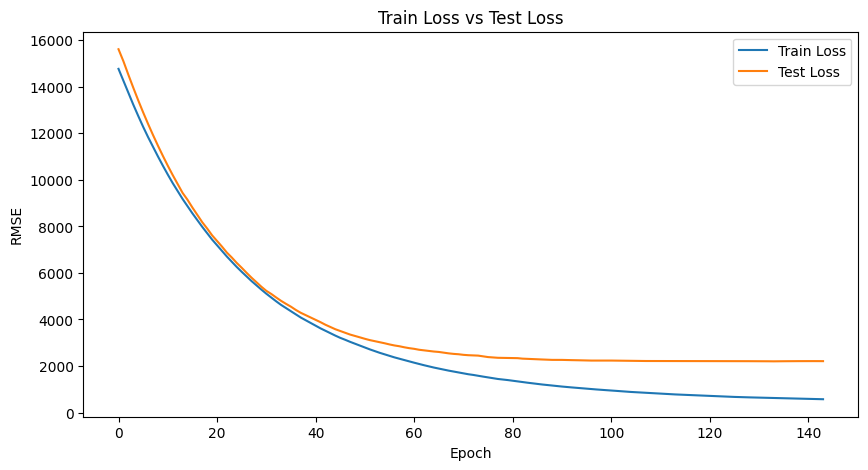

In [38]:
# XGBoost의 native API를 사용하여 DMatrix 객체 생성
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 훈련 데이터와 검증 데이터 설정
evals = [(dtrain, 'train'), (dtest, 'eval')]

# 모델 훈련
evals_result = {}  # 훈련 과정에서의 metric 값을 저장할 딕셔너리
bst = xgb.train(best_params, dtrain, num_boost_round=144, evals=evals, evals_result=evals_result, verbose_eval=False)

# epoch마다의 train과 test loss (RMSE) 저장
train_errors = evals_result['train']['rmse']
test_errors = evals_result['eval']['rmse']

# epoch마다의 train과 test loss 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(train_errors, label='Train Loss')
plt.plot(test_errors, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.title('Train Loss vs Test Loss')
plt.show()
